In [1]:
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

In [2]:
conn = sqlite3.connect("imdb.db")

In [4]:
tabelas = pd.read_sql_query("SELECT NAME AS 'table_name' FROM sqlite_master WHERE type = 'table'", conn)

In [5]:
tabelas = tabelas["table_name"].values.tolist()

In [6]:
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie'GROUP BY genres'''

In [7]:
resultado2 = pd.read_sql_query(consulta2, conn)

In [8]:
display(resultado2)

,genres,COUNT(*)
0,Action,13731
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1447,"Thriller,Western",43
1448,War,1282
1449,"War,Western",13
1450,Western,5111


In [9]:
#converter para letra minuscula
resultado2['genres'] = resultado2['genres'].str.lower().values

In [10]:
#remover os valores na DROPNA
temp = resultado2['genres'].dropna()

In [11]:
#one-hot encoded usado bastante em deep learning
#a ideia é receber em uma coluna os nomes dos generos, transformar isso em uma matriz esparsa
# que irá numerar a quantidade de itens para cada tipo de genero, facilitando a contagem posterior
#acessar a documentação do sklearn.feature_extraction.text.CountVectorizer

In [12]:
#Criar um vetor usando uma expressão regular para filtrar as strings
padrao = '(?u)\\b[\\w-]+\\b'
vetor = CountVectorizer(token_pattern= padrao, analyzer = 'word').fit(temp)

In [13]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [14]:
bag_generos = vetor.transform(temp)

In [15]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [16]:
generos_unicos = vetor.get_feature_names()

In [17]:
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [18]:
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1451
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1452 non-null   int64
 1   adult        1452 non-null   int64
 2   adventure    1452 non-null   int64
 3   animation    1452 non-null   int64
 4   biography    1452 non-null   int64
 5   comedy       1452 non-null   int64
 6   crime        1452 non-null   int64
 7   documentary  1452 non-null   int64
 8   drama        1452 non-null   int64
 9   family       1452 non-null   int64
 10  fantasy      1452 non-null   int64
 11  film-noir    1452 non-null   int64
 12  game-show    1452 non-null   int64
 13  history      1452 non-null   int64
 14  horror       1452 non-null   int64
 15  music        1452 non-null   int64
 16  musical      1452 non-null   int64
 17  mystery      1452 non-null   int64
 18  n            1452 non-null   int64
 19  news         1452 non-null   int64
 20  reality-

In [19]:
generos = generos.drop(columns = 'n', axis = 0)

In [20]:
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending=False) / generos.shape[0]

In [21]:
generos_percentual.head(10)

drama          18.250689
comedy         16.873278
documentary    15.977961
adventure      14.944904
action         14.256198
romance        13.360882
crime          13.085399
mystery        12.396694
fantasy        12.258953
thriller       12.258953
dtype: float64

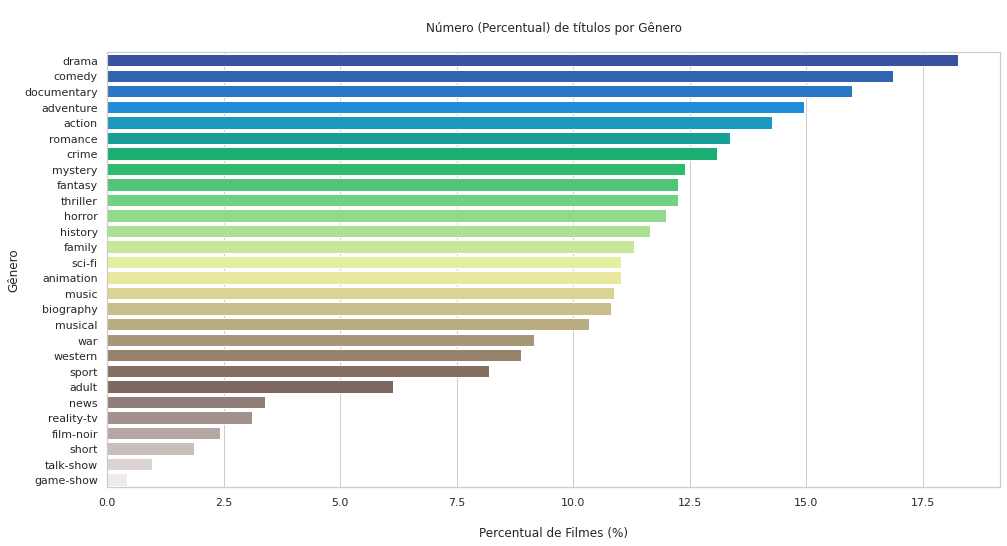

In [24]:
#plot
plt.figure(figsize=(16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient= 'h', palette='terrain')
plt.ylabel('Gênero')
plt.xlabel('\nPercentual de Filmes (%)')
plt.title('\nNúmero (Percentual) de títulos por Gênero\n')
plt.show()